In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
!apt-get update
!apt-get install gdal-bin python3-gdal -y

!pip install numpy pandas geopandas rasterio Pillow matplotlib pyyaml shapely
!pip install cupy-cuda12x
!pip install dask



Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,715 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,428 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/honors_thesis/data_processing/scripts_new

/content/drive/MyDrive/honors_thesis/data_processing/scripts_new


In [ ]:

#part 1
!python pipeline.py \
    --input-dirs "/content/drive/MyDrive/honors_thesis/data/raw/location_1" \
    "/content/drive/MyDrive/honors_thesis/data/raw/location_2" \
    "/content/drive/MyDrive/honors_thesis/data/raw/location_3" \
    --output-dir "/content/drive/MyDrive/honors_thesis/data/" \


# !python pipeline.py \
#     --input-dirs "/content/drive/MyDrive/honors_thesis/data/raw/location_1" \
#     --output-dir "/content/drive/MyDrive/honors_thesis/data/" \
#     --chip-size 256 \
#     --overlap 10 \
#     --min-deforestation 0

Loading process_sentinel.py
Starting Sentinel-2 processing pipeline

Processing input directory: /content/drive/MyDrive/honors_thesis/data/raw/location_1
Processing location: location_1
Input dir 2022: /content/drive/MyDrive/honors_thesis/data/raw/location_1/sentinel2/july2022
Input dir 2023: /content/drive/MyDrive/honors_thesis/data/raw/location_1/sentinel2/july2023
Filtering Sentinel bands for 2022...
▶ Processing: location_1_2022_clr_mosaic.tif
    Missing‑band distribution [unknown‑time]: 0:123899161, 1:44528
    ✔ Saved → location_1_2022_clr_mosaic_filtered.tif

▶ Processing: location_1_2022_clr_mosaic-0000000000-0000000000.tif
    Missing‑band distribution [unknown‑time]: 0:196606853, 1:46459
    ✔ Saved → location_1_2022_clr_mosaic-0000000000-0000000000_filtered.tif

▶ Processing: location_1_2022_clr_mosaic-0000000000-0000017664.tif
    Missing‑band distribution [unknown‑time]: 0:51202600, 1:20333
    ✔ Saved → location_1_2022_clr_mosaic-0000000000-0000017664_filtered.tif

Filte

In [ ]:
#part 2, used gpu
!python pipeline_2ndhalf.py \
    --input-dirs "/content/drive/MyDrive/honors_thesis/data/processed/location_1" \
    "/content/drive/MyDrive/honors_thesis/data/processed/location_2" \
    "/content/drive/MyDrive/honors_thesis/data/processed/location_3" \
    --output-dir "/tmp" \
    --chip-size 256 \
    --overlap 80 \
    --min-deforestation 0


#now trying just with one location
# !python pipeline_2ndhalf.py \
#     --input-dirs "/content/drive/MyDrive/honors_thesis/data/processed/location_1" \
#     --output-dir "/tmp" \
#     --chip-size 256 \
#     --overlap 10 \
#     --min-deforestation 0


#now moving from temp storage to google drive as .zip




Location 1: original size (H, W) = (11133, 22265)
Finished. Train 8292 Test 0 Val 1508 Total 9800
Updated counters: Train=8292, Test=0, Val=1508
Location 2: original size (H, W) = (22265, 11133)
Finished. Train 16584 Test 0 Val 3016 Total 9800
Updated counters: Train=16584, Test=0, Val=3016
Location 3: original size (H, W) = (22265, 11133)
Finished. Train 16584 Test 4753 Val 3016 Total 4753
Updated counters: Train=16584, Test=4753, Val=3016

All directories processed.
Total Train Chips: 16584
Total Test Chips:  4753
Total Val Chips:   3016
Grand Total:       24353


In [ ]:

#now part 3
!python npy_txt.py "/tmp/chips"

Input root: /tmp/chips
Skip ids : []

Processing train – 19468 files…
  ↳ completed train: 19468/19468 files in 246.9s
Processing test – 4753 files…
  ↳ completed test: 4753/4753 files in 27.6s
Processing val – 3016 files…
  ↳ completed val: 3016/3016 files in 31.7s

📄 Stats written → /tmp/chips/train_aggregated_band_statistics.csv

Aggregated training statistics:
  band2 | mean=658.203365  std=902.648724  min=0.000000  max=19048.000000  valid=1275854848  missing=0
  band3 | mean=827.672933  std=839.936794  min=0.000000  max=17720.000000  valid=1275854848  missing=0
  band4 | mean=777.307585  std=870.684309  min=0.000000  max=16888.000000  valid=1275854848  missing=0
  band8 | mean=2798.142821  std=778.973733  min=0.000000  max=15930.000000  valid=1275854848  missing=0

✅ Done!


In [ ]:
#Now moving from temp storage to google drive
print("Checking /tmp/chips folder existence:")
!if [ -d "/tmp/chips" ]; then echo "/tmp/chips exists"; else echo "/tmp/chips does not exist"; fi

print("\nCounting files in /tmp/chips:")
!if [ -d "/tmp/chips" ]; then find /tmp/chips -type f | wc -l; else echo "No folder to count."; fi

print("\nCalculating folder size of /tmp/chips:")
!if [ -d "/tmp/chips" ]; then du -sh /tmp/chips; else echo "No folder to check size."; fi

# 1) Make sure the Drive directory exists
!mkdir -p "/content/drive/MyDrive/honors_thesis/data/local_copy2"

# 2) Zip the /tmp/chips folder directly into a .zip file **on Drive**
!zip -r "/content/drive/MyDrive/honors_thesis/data/local_copy2/chips.zip" "/tmp/chips"

# 3) If the above completes successfully, remove the original local folder
#!rm -rf "/tmp/chips"

Streaming output truncated to the last 5000 lines.
  adding: tmp/chips/train/after/chip_15434.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_18699.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_10347.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_15534.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_17579.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_10292.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_11352.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_10889.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_11571.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_08406.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_14443.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_09873.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_12610.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_14649.npz (deflated 0%)
  adding: tmp/chips/train/after/chip_13129.npz (deflated 0%)
  adding: tmp/chips/train/after/ch

In [ ]:
import os
import time
from google.colab import runtime

# Path to the zip file
zip_path = "/content/drive/MyDrive/honors_thesis/data/local_copy2/chips.zip"

# Sleep for 5 minutes (300 seconds)
print("Sleeping for 5 minutes...")
time.sleep(12000)

# Check if the zip file exists
if os.path.exists(zip_path):
    print(f"Zip file found at {zip_path}")
    # End the Colab runtime/session
    print("Ending Google Colab session...")
    runtime.unassign()
else:
    print(f"No zip file found at {zip_path}")

Sleeping for 5 minutes...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Adjust these if needed
before_dir = Path.home().parent / 'tmp' / 'chips' / 'val' / 'before'
after_dir  = before_dir.with_name('after')  # same parent, but “after”
TOP_N = 5

# Step 1: Compute cloudiness on the before-chips
cloudiness = []
for npz_path in before_dir.glob('*.npz'):
    img = np.load(npz_path)['array']
    mean_pct = img[4].astype(float).mean()     # band 4 = cloud score
    cloudiness.append((mean_pct, npz_path))
cloudiness.sort(key=lambda x: x[0], reverse=True)

# Step 2: For each top chip, load before & after, stretch, and plot side by side
for mean_pct, before_path in cloudiness[:TOP_N]:
    # load arrays
    before = np.load(before_path)['array'][:3].astype(float)
    after  = np.load(after_dir / before_path.name)['array'][:3].astype(float)

    def stretch(img, p_low=2, p_high=98):
        p2, p98 = np.percentile(img, (p_low, p_high))
        stretched = np.clip((img - p2) / (p98 - p2), 0, 1)
        return np.transpose(stretched, (1, 2, 0))  # to H×W×3

    before_rgb = stretch(before)
    after_rgb  = stretch(after)

    # plot side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(before_rgb)
    ax1.set_title(f"Before: {before_path.name}\nmean cloud {mean_pct:.1f}%")
    ax1.axis('off')

    ax2.imshow(after_rgb)
    ax2.set_title(f"After:  {before_path.name}")
    ax2.axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
from pathlib import Path

# 1) Point at your validation before/after folders
before_dir = Path.home().parent / 'tmp' / 'chips' / 'val' / 'before'
after_dir  = before_dir.with_name('after')  # assumes same parent

# 2) Find the chip with the most ones in band 5
best = ( -1, None )  # (count, path)
for npz_path in before_dir.glob('*.npz'):
    arr = np.load(npz_path)['array']
    band5 = arr[5]  # zero-indexed band 5
    count_ones = int((band5 == 1).sum())
    if count_ones > best[0]:
        best = (count_ones, npz_path)

# 3) Unpack and locate the matching after-chip
max_ones, best_before = best
best_after = after_dir / best_before.name

# 4) Print results
print(f"Before-chip with most 1’s in band 5: {best_before.name} → {max_ones} ones")
print(f"Matching after-chip filename:      {best_after.name}")


Before-chip with most 1’s in band 5: chip_01452.npz → 511 ones
Matching after-chip filename:      chip_01452.npz


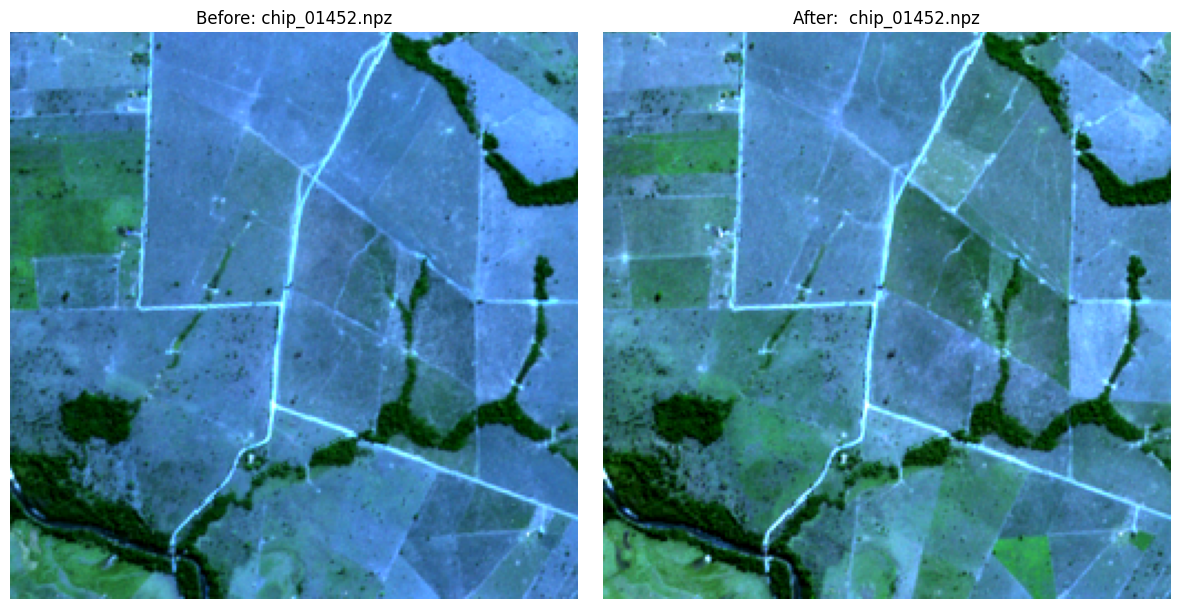

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuration: name of the chip and directories
chip_name = 'chip_01452.npz'
before_dir = Path.home().parent / 'tmp' / 'chips' / 'val' / 'before'
after_dir  = before_dir.with_name('after')

# Full paths
before_path = before_dir / chip_name
after_path  = after_dir  / chip_name

# Check that both files exist
for p in (before_path, after_path):
    if not p.exists():
        raise FileNotFoundError(f"File not found: {p}")

# Load first three bands (0,1,2) and convert to float
before = np.load(before_path)['array'][:3].astype(float)
after  = np.load(after_path) ['array'][:3].astype(float)

# Percentile‐stretch helper
def stretch(img, low=2, high=98):
    pl, ph = np.percentile(img, (low, high))
    clipped = np.clip((img - pl) / (ph - pl), 0, 1)
    return np.transpose(clipped, (1, 2, 0))  # → H×W×3

# Apply stretch
before_rgb = stretch(before)
after_rgb  = stretch(after)

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(before_rgb)
ax1.set_title(f"Before: {chip_name}")
ax1.axis('off')

ax2.imshow(after_rgb)
ax2.set_title(f"After:  {chip_name}")
ax2.axis('off')

plt.tight_layout()
plt.show()


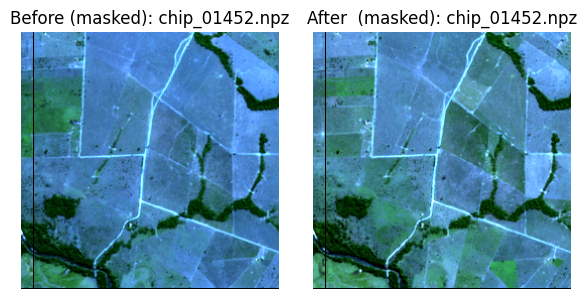

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuration
chip_name  = 'chip_01452.npz'
base_val   = Path.home().parent / 'tmp' / 'chips' / 'val'
before_dir = base_val / 'before'
after_dir  = base_val / 'after'

# Paths
before_path = before_dir / chip_name
after_path  = after_dir  / chip_name

# Ensure files exist
for p in (before_path, after_path):
    if not p.exists():
        raise FileNotFoundError(f"File not found: {p}")

# Load arrays
arr_before = np.load(before_path)['array']
arr_after  = np.load(after_path) ['array']

# Extract first three bands and the mask band
b5_before = arr_before[5]            # mask band
b5_after  = arr_after[5]             # should be same mask
mask      = (b5_before == 1)         # True where we want black

bands_before = arr_before[:3].astype(float)
bands_after  = arr_after [:3].astype(float)

# Stretch helper
def stretch(img, low=2, high=98):
    pl, ph = np.percentile(img, (low, high))
    clipped = np.clip((img - pl) / (ph - pl), 0, 1)
    return np.transpose(clipped, (1, 2, 0))  # H×W×3

# Build RGB images
rgb_before = stretch(bands_before)
rgb_after  = stretch(bands_after)

# Apply mask: set masked pixels to black
rgb_before[mask] = 0
rgb_after [mask] = 0

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.imshow(rgb_before)
ax1.set_title(f"Before (masked): {chip_name}")
ax1.axis('off')

ax2.imshow(rgb_after)
ax2.set_title(f"After  (masked): {chip_name}")
ax2.axis('off')

plt.tight_layout()
plt.show()
